# Clustering drills

Welcome, traveller, you have arrived in the drills section of the clustering chapter. Here, you can practice some clustering techniques.

If you have not checked out the [example](./1.clustering_with_sklearn.ipynb), I advise you do so. We will use the same [pokemon](./assets/pokemon.csv) dataset to further our journey.

## 1. Multi-dimensional data

in the example, we wanted to determine the **most physically diverse** [pokemon](./assets/pokemon.csv) team there is. To do so, we clustered the pokemon into groups according to their **weight** and **height** using **k-means**.

Is this really the most diverse team out there though? The pokemon selected there are still similar in terms of **combat abilities**, and we have this data available.

For the first drill, I want you to:
   - cluster the pokemon into 6 groups according to similar:
       - height
       - weight
       - hp
       - attack
       - defense
       - speed
   - visualise these multidimensional clusters using a scatter plot matrix
   - determine the most dissimilar pokemon team from these clusters
   
So that you have **6-dimensional** clusters containing **diverse** pokemon groups from which you can determine your pokemon team similar to the method described in the example.

In [1]:
import pandas as pd

pokemon = pd.read_csv("./assets/pokemon.csv")
pokemon

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,1,65,65,45,grass,poison,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,2,80,80,60,grass,poison,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,3,122,120,80,grass,poison,100.0,1,0
3,"['Blaze', 'Solar Power']",0.50,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,4,60,50,65,fire,NaN,8.5,1,0
4,"['Blaze', 'Solar Power']",0.50,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,5,80,65,80,fire,NaN,19.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,['Beast Boost'],0.25,1.0,0.5,2.0,0.5,1.0,2.0,0.5,1.0,...,NaN,797,107,101,61,steel,flying,999.9,7,1
797,['Beast Boost'],1.00,1.0,0.5,0.5,0.5,2.0,4.0,1.0,1.0,...,NaN,798,59,31,109,grass,steel,0.1,7,1
798,['Beast Boost'],2.00,0.5,2.0,0.5,4.0,2.0,0.5,1.0,0.5,...,NaN,799,97,53,43,dark,dragon,888.0,7,1
799,['Prism Armor'],2.00,2.0,1.0,1.0,1.0,0.5,1.0,1.0,2.0,...,NaN,800,127,89,79,psychic,NaN,230.0,7,1


In [2]:
# check number of invalid metric entries
print(pokemon['weight_kg'].isnull().sum())
print(pokemon['height_m'].isnull().sum())
print(pokemon['hp'].isnull().sum())
print(pokemon['attack'].isnull().sum())
print(pokemon['defense'].isnull().sum())
print(pokemon['speed'].isnull().sum())


20
20
0
0
0
0


In [3]:
# drop rows containing null values for weight or height
pokemon = pokemon.dropna(axis=0, subset=['weight_kg'])
pokemon = pokemon.dropna(axis=0, subset=['height_m'])

# adjusting index
pokemon = pokemon.reset_index(drop=True)

In [4]:
# cluster your pokemon here
from sklearn.cluster import KMeans

# number of pokemon clusters
team_size = 6

# make new dataframe with relevant metrics
pokemon_metrics = pokemon['weight_kg'].to_frame().join(pokemon['height_m'].to_frame()).join(pokemon['hp'].to_frame()).join(pokemon['attack'].to_frame()).join(pokemon['defense'].to_frame()).join(pokemon['speed'].to_frame())

# z-score standardization
pokemon_metrics_standardized =(pokemon_metrics-pokemon_metrics.mean())/pokemon_metrics.std()
pokemon_metrics_standardized = pokemon_metrics_standardized.rename(columns={'weight_kg': 'weight_zscore',
                                                                        'height_m':'height_zscore',
                                                                       'hp':'hp_zscore',
                                                                       'attack':'attack_zscore',
                                                                       'defense':'defense_zscore',
                                                                       'speed':'speed_zscore'})

# fit a kmeans object to the dataset
kmeans = KMeans(n_clusters=team_size, init='k-means++').fit(pokemon_metrics_standardized)

# clusters is an attribute of the object
cluster_centers = kmeans.cluster_centers_

# add cluster index to dataframe
cluster_labels = pd.Series(kmeans.labels_, name='cluster')
pokemon_metrics_standardized = pokemon_metrics_standardized.join(cluster_labels.to_frame())
pokemon_metrics_standardized
#pokemon_metrics2 = pokemon.loc[:,['weight_kg', 'height_m', 'hp']]
#pokemon_metrics2

,weight_zscore,height_zscore,hp_zscore,attack_zscore,defense_zscore,speed_zscore,cluster
0,-0.498178,-0.429400,-0.907100,-0.890461,-0.779152,-0.736195,3
1,-0.442396,-0.151706,-0.343650,-0.487032,-0.324695,-0.217239,3
2,0.353180,0.773940,0.407618,0.692223,1.622977,0.474702,5
3,-0.483546,-0.521965,-1.132480,-0.797362,-0.973919,-0.044254,3
4,-0.387529,-0.059142,-0.418776,-0.424966,-0.487001,0.474702,3
...,...,...,...,...,...,...,...
776,8.582359,7.438593,1.046195,0.723256,0.973753,-0.182642,4
777,-0.560361,-0.799659,-0.381213,3.205898,1.882666,1.478016,0
778,7.559084,4.013702,5.779180,0.723256,-0.649307,-0.805389,4
779,1.541971,1.144198,1.046195,0.909454,0.908830,0.440105,2


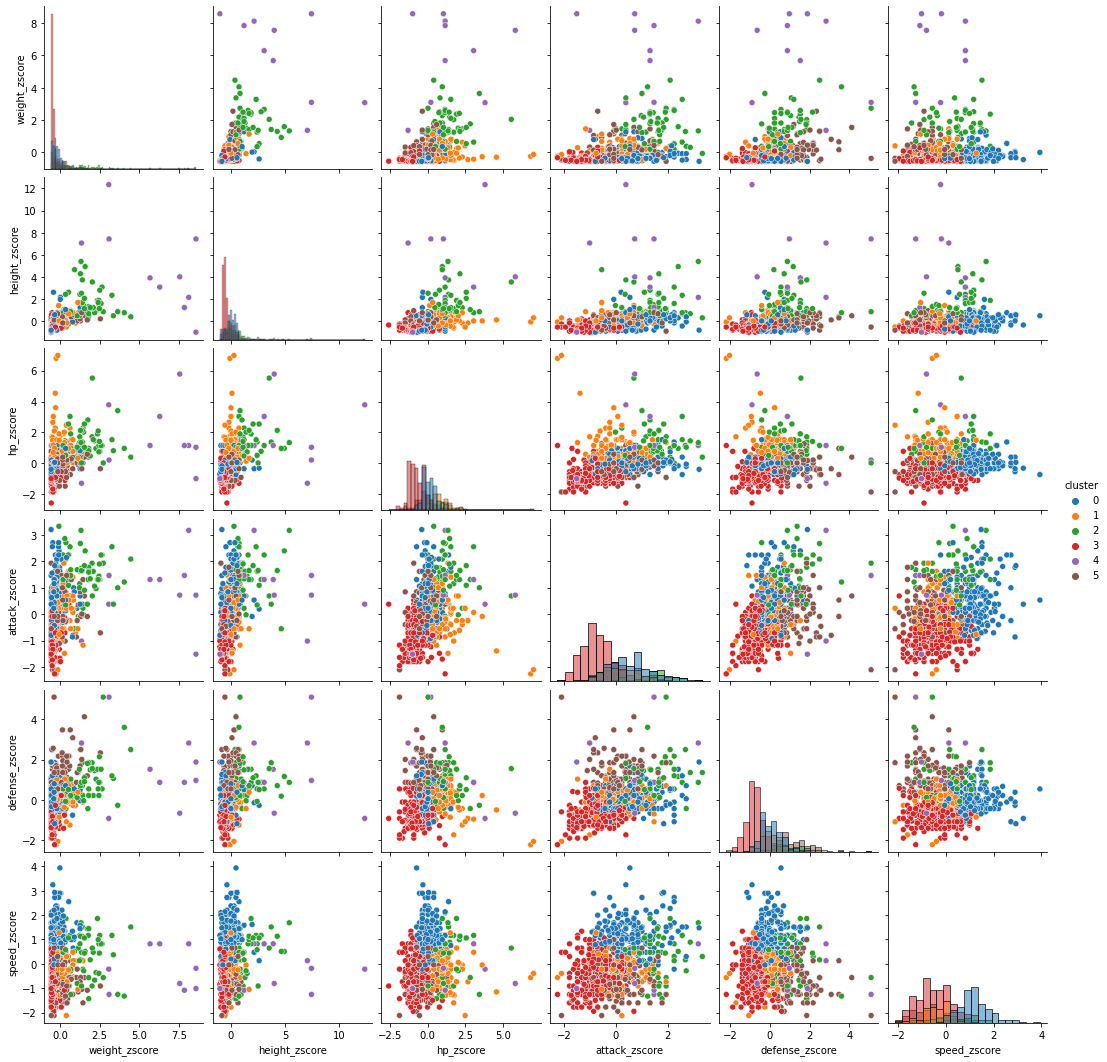

In [5]:
# visualise your clusters here (take a look at the pandas scatter_matrix or seaborn's pairplot method)
import seaborn as sns
sns.pairplot(pokemon_metrics_standardized, hue='cluster', diag_kind="hist", palette = 'tab10')

In [6]:
# determine your final pokemon here

In [7]:
import numpy as np        
        
       
def distance_to_other_clusters(single_pokemon):
    metric = np.array([single_pokemon['weight_zscore'], single_pokemon['height_zscore'], single_pokemon['hp_zscore'],
                       single_pokemon['attack_zscore'], single_pokemon['defense_zscore'],
                       single_pokemon['speed_zscore']])
    cluster_number = round(single_pokemon['cluster'])
    distance = 0
    for cluster_index in range(0, len(cluster_centers)):
        if cluster_index == cluster_number:
            continue
        center = cluster_centers[cluster_index]
        distance += np.sqrt(sum(np.square(metric - center)))
    return distance

# evaluate all pokemon
pokemon_dissimilarity = pokemon_metrics_standardized.apply(distance_to_other_clusters, axis=1)
pokemon_dissimilarity = pokemon_dissimilarity.rename('dissimilarity')

# join to other metrics
pokemon_processed = pokemon_metrics_standardized.join(pokemon_dissimilarity.to_frame()).join(pokemon['name'].to_frame())

# pick most dissimilar pokemon per cluster
chosen_pokemon = pd.DataFrame()
for cluster_index in range(0, len(cluster_centers)):
    pokemon_cluster = pokemon_processed[pokemon_processed['cluster'] == cluster_index]
    chosen_pokemon = chosen_pokemon.append(pokemon_cluster[pokemon_cluster['dissimilarity']==pokemon_cluster['dissimilarity'].max()])

chosen_pokemon


,weight_zscore,height_zscore,hp_zscore,attack_zscore,defense_zscore,speed_zscore,cluster,dissimilarity,name
367,-0.005287,0.496246,-0.719283,0.537058,0.551757,3.934406,0,27.857716,Deoxys
94,-0.244874,-0.059142,6.793391,-2.255914,-2.207445,-0.563210,1,42.322911,Chansey
699,2.041264,3.550879,5.516236,0.692223,1.558054,0.647687,2,34.662598,Zygarde
330,-0.493605,-0.521965,-1.846184,-1.945584,-1.720527,0.474702,3,28.408707,Feebas
302,3.078255,12.344519,3.788321,0.381893,-0.908997,-0.217239,4,65.388911,Wailord
194,-0.373812,-0.521965,-1.846184,-2.100749,5.096325,-2.120077,5,37.406181,Shuckle


## 2. Similarity criteria

Very nice! What a unique team!

You probably used the same **similarity criteria** as the introduction example. **k-means** uses Euclidean distance as a similarity criteria, so it makes sense that we also use Euclidean distance for our **dissimilarity criteria**, but what would happen if we picked something else?

"Woah, you're going too fast, 'Euclidean distance'? What do you mean by that?"

This is distance as we know it in the **real world**, a line connecting two points. But distance does not have to be defined this way in our **problem space**, it can be **Manhattan distance**, or **squared distance**, or something else entirely.

<img src="https://media.springernature.com/original/springer-static/image/chp%3A10.1007%2F978-981-10-8818-6_7/MediaObjects/463464_1_En_7_Fig2_HTML.jpg" align="center" width="600"/>

Replacing this similarity criteria for the `sklearn` k-means is no trivial task, so I will not ask this of you, but changing it for our **dissimilarity criteria** should be doable.

For the next exercise, I would like you to:
- replace the dissimilarity criteria from the example by:
    - manhattan distance
    - squared distance
    - 1/(squared distance)

In [8]:
# Assign dissimilarity to your pokemon here

In [9]:
def distance_to_other_clusters_manhattan(single_pokemon):
    metric = np.array([single_pokemon['weight_zscore'], single_pokemon['height_zscore'], single_pokemon['hp_zscore'],
                       single_pokemon['attack_zscore'], single_pokemon['defense_zscore'],
                       single_pokemon['speed_zscore']])
    cluster_number = round(single_pokemon['cluster'])
    distance = 0
    for cluster_index in range(0, len(cluster_centers)):
        if cluster_index == cluster_number:
            continue
        center = cluster_centers[cluster_index]
        distance += sum(abs(metric - center))
    return distance

# evaluate all pokemon
pokemon_dissimilarity = pokemon_metrics_standardized.apply(distance_to_other_clusters_manhattan, axis=1)
pokemon_dissimilarity = pokemon_dissimilarity.rename('dissimilarity')

# join to other metrics
pokemon_processed = pokemon_metrics_standardized.join(pokemon_dissimilarity.to_frame()).join(pokemon['name'].to_frame())

# pick most dissimilar pokemon per cluster
chosen_pokemon2 = pd.DataFrame()
for cluster_index in range(0, len(cluster_centers)):
    pokemon_cluster = pokemon_processed[pokemon_processed['cluster'] == cluster_index]
    chosen_pokemon2 = chosen_pokemon2.append(pokemon_cluster[pokemon_cluster['dissimilarity']==pokemon_cluster['dissimilarity'].max()])

chosen_pokemon2

,weight_zscore,height_zscore,hp_zscore,attack_zscore,defense_zscore,speed_zscore,cluster,dissimilarity,name
777,-0.560361,-0.799659,-0.381213,3.205898,1.882666,1.478016,0,54.649288,Kartana
94,-0.244874,-0.059142,6.793391,-2.255914,-2.207445,-0.563210,1,78.751258,Chansey
699,2.041264,3.550879,5.516236,0.692223,1.558054,0.647687,2,67.545281,Zygarde
330,-0.493605,-0.521965,-1.846184,-1.945584,-1.720527,0.474702,3,61.058805,Feebas
302,3.078255,12.344519,3.788321,0.381893,-0.908997,-0.217239,4,104.239768,Wailord
194,-0.373812,-0.521965,-1.846184,-2.100749,5.096325,-2.120077,5,77.658929,Shuckle


In [10]:
def distance_to_other_clusters_squared_distance(single_pokemon):
    metric = np.array([single_pokemon['weight_zscore'], single_pokemon['height_zscore'], single_pokemon['hp_zscore'],
                       single_pokemon['attack_zscore'], single_pokemon['defense_zscore'],
                       single_pokemon['speed_zscore']])
    cluster_number = round(single_pokemon['cluster'])
    distance = 0
    for cluster_index in range(0, len(cluster_centers)):
        if cluster_index == cluster_number:
            continue
        center = cluster_centers[cluster_index]
        distance += sum(np.square(metric - center))
    return distance

# evaluate all pokemon
pokemon_dissimilarity = pokemon_metrics_standardized.apply(distance_to_other_clusters_squared_distance, axis=1)
pokemon_dissimilarity = pokemon_dissimilarity.rename('dissimilarity')

# join to other metrics
pokemon_processed = pokemon_metrics_standardized.join(pokemon_dissimilarity.to_frame()).join(pokemon['name'].to_frame())

# pick most dissimilar pokemon per cluster
chosen_pokemon3 = pd.DataFrame()
for cluster_index in range(0, len(cluster_centers)):
    pokemon_cluster = pokemon_processed[pokemon_processed['cluster'] == cluster_index]
    chosen_pokemon3 = chosen_pokemon3.append(pokemon_cluster[pokemon_cluster['dissimilarity']==pokemon_cluster['dissimilarity'].max()])

chosen_pokemon3

,weight_zscore,height_zscore,hp_zscore,attack_zscore,defense_zscore,speed_zscore,cluster,dissimilarity,name
367,-0.005287,0.496246,-0.719283,0.537058,0.551757,3.934406,0,168.375719,Deoxys
94,-0.244874,-0.059142,6.793391,-2.255914,-2.207445,-0.563210,1,364.511955,Chansey
699,2.041264,3.550879,5.516236,0.692223,1.558054,0.647687,2,244.023707,Zygarde
330,-0.493605,-0.521965,-1.846184,-1.945584,-1.720527,0.474702,3,188.424523,Feebas
302,3.078255,12.344519,3.788321,0.381893,-0.908997,-0.217239,4,859.170128,Wailord
194,-0.373812,-0.521965,-1.846184,-2.100749,5.096325,-2.120077,5,289.976450,Shuckle


In [11]:
def distance_to_other_clusters_InvSquared_distance(single_pokemon):
    metric = np.array([single_pokemon['weight_zscore'], single_pokemon['height_zscore'], single_pokemon['hp_zscore'],
                       single_pokemon['attack_zscore'], single_pokemon['defense_zscore'],
                       single_pokemon['speed_zscore']])
    cluster_number = round(single_pokemon['cluster'])
    distance = 0
    for cluster_index in range(0, len(cluster_centers)):
        if cluster_index == cluster_number:
            continue
        center = cluster_centers[cluster_index]
        distance += sum(1/np.square(metric - center))
    return distance

# evaluate all pokemon
pokemon_dissimilarity = pokemon_metrics_standardized.apply(distance_to_other_clusters_InvSquared_distance, axis=1)
pokemon_dissimilarity = pokemon_dissimilarity.rename('dissimilarity')

# join to other metrics
pokemon_processed = pokemon_metrics_standardized.join(pokemon_dissimilarity.to_frame()).join(pokemon['name'].to_frame())

# pick most dissimilar pokemon per cluster
chosen_pokemon4 = pd.DataFrame()
for cluster_index in range(0, len(cluster_centers)):
    pokemon_cluster = pokemon_processed[pokemon_processed['cluster'] == cluster_index]
    chosen_pokemon4 = chosen_pokemon4.append(pokemon_cluster[pokemon_cluster['dissimilarity']==pokemon_cluster['dissimilarity'].max()])

chosen_pokemon4

,weight_zscore,height_zscore,hp_zscore,attack_zscore,defense_zscore,speed_zscore,cluster,dissimilarity,name
491,-0.218354,-0.059142,-0.193396,0.319827,-0.746691,1.374225,0,5.524642e+06,Liepard
145,-0.188177,0.403681,1.158885,-0.859428,-0.746691,0.128731,1,5.519432e+06,Noctowl
625,2.593594,1.607022,1.158885,2.243875,1.525593,0.820672,2,2.389129e+04,Zekrom
679,-0.330832,0.125987,0.294928,-0.580131,-0.746691,-0.701598,3,1.407907e+06,Amaura
776,8.582359,7.438593,1.046195,0.723256,0.973753,-0.182642,4,3.389923e+03,Celesteela
82,-0.012602,0.125987,-0.531466,1.623214,1.363287,0.301716,5,1.393803e+06,Kingler


Did your team change? Why do you think it did(n't)? Discuss this with one of your colleagues!

## 3. Heterogenous data

There! We did it! The most **diverse pokémon team** possible...or is it?

We have clustered our pokémon according to **weight** and **height** in the example, and according to **combat abilities** in the first drill, but what about **pokémon type**?

Some of the chosen pokémon may have the same type, as this data was ignored during clustering? But to get a really diverse team, we should take these into account!

For this drill I want you to:
- cluster the pokémon into 6 groups according to similar:
    - weight
    - height
    - primary pokémon type
    - secondary pokémon type
- determine the most dissimilar pokemon team from these clusters

But wait, these pokémon types, they're in **text format**, how do you compare these to the **numerical data**? It's time to **vectorize** this data. **Vectorizing** this textual data means representing this data in a way that can be understood by machine learning algorithms. 

For example, let's say there are only 3 pokémon types, and pokémon can only have one type. Vectorising a **grass**, **fire**, and **water** pokémon would look like this:
- grass -> [1, 0, 0]
- fire  -> [0, 1, 0]
- water -> [0, 0, 1]

So in this case, **3-dimensional** data. In our case though, we have a weight dimension, a height dimension, 18 primary and secondary dimensions, so a whopping **38 dimensions**

In [12]:
# vectorize your pokémon type data here (there are modules that vectorize data)

In [13]:
pokemon_type = pokemon['weight_kg'].to_frame().join(pokemon['height_m'].to_frame()).join(pokemon['type1'].to_frame()).join(pokemon['type2'].to_frame())
pokemon_type


,weight_kg,height_m,type1,type2
0,6.9,0.7,grass,poison
1,13.0,1.0,grass,poison
2,100.0,2.0,grass,poison
3,8.5,0.6,fire,NaN
4,19.0,1.1,fire,NaN
...,...,...,...,...
776,999.9,9.2,steel,flying
777,0.1,0.3,grass,steel
778,888.0,5.5,dark,dragon
779,230.0,2.4,psychic,NaN


In [14]:
print(pokemon['weight_kg'].isnull().sum())
print(pokemon['height_m'].isnull().sum())
print(pokemon['type1'].isnull().sum())
print(pokemon['type2'].isnull().sum())

0
0
0
383


In [15]:
pokemon_TYPE = pokemon_type.replace(np.nan, 'None', regex=True)
pokemon_TYPE

,weight_kg,height_m,type1,type2
0,6.9,0.7,grass,poison
1,13.0,1.0,grass,poison
2,100.0,2.0,grass,poison
3,8.5,0.6,fire,None
4,19.0,1.1,fire,None
...,...,...,...,...
776,999.9,9.2,steel,flying
777,0.1,0.3,grass,steel
778,888.0,5.5,dark,dragon
779,230.0,2.4,psychic,None


In [16]:
pokemon_metrics_standardized =(pokemon_metrics-pokemon_metrics.mean())/pokemon_metrics.std()

In [17]:
print(pokemon_TYPE['type1'].nunique())
print(pokemon_TYPE['type2'].nunique())


18
19


### 3-1 Dummy variable (without droping of one column)

In [247]:
#pokemon_TYPE['type1'] = pokemon_TYPE['type1'].astype(str)
pokemon_enc = pd.get_dummies(pokemon_TYPE, drop_first=False)
pokemon_enc 

,weight_kg,height_m,type1_bug,type1_dark,type1_dragon,type1_electric,type1_fairy,type1_fighting,type1_fire,type1_flying,...,type2_ghost,type2_grass,type2_ground,type2_ice,type2_normal,type2_poison,type2_psychic,type2_rock,type2_steel,type2_water
0,6.9,0.7,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,13.0,1.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,100.0,2.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,8.5,0.6,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,19.0,1.1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
776,999.9,9.2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
777,0.1,0.3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
778,888.0,5.5,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
779,230.0,2.4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [248]:
from sklearn.preprocessing import StandardScaler
pokemon_enc_standerdized=pd.DataFrame(StandardScaler().fit_transform(pokemon_enc[['weight_kg','height_m']]))
pokemon_enc_standerdized = pokemon_enc_standerdized.rename(columns={0: 'weight_zscore',
                                                                        1:'height_zscore',
                                                                       })
pokemon_enc_standerdized

,weight_zscore,height_zscore
0,-0.498497,-0.429675
1,-0.442679,-0.151804
2,0.353406,0.774436
3,-0.483856,-0.522299
4,-0.387777,-0.059180
...,...,...
776,8.587859,7.443360
777,-0.560720,-0.800171
778,7.563928,4.016274
779,1.542959,1.144932


In [291]:
pokemon_enc_STANDARDIZED = pokemon_enc_standerdized.join(pokemon_enc)


In [290]:
pokemon_enc_STANDARDIZED2 = pokemon_enc_STANDARDIZED.drop(['weight_kg', 'height_m'], axis = 1)


In [292]:
# cluster your multi-dimensional pokémon data here
# fit a kmeans object to the dataset
kmeans2 = KMeans(n_clusters=team_size, init='k-means++').fit(pokemon_enc_STANDARDIZED2)
# clusters is an attribute of the object
cluster_centers2 = kmeans2.cluster_centers_

# add cluster index to dataframe
cluster_labels = pd.Series(kmeans.labels_, name='cluster')
pokemon_enc_STANDARDIZED2 = pokemon_enc_STANDARDIZED2.join(cluster_labels.to_frame())



In [293]:
#list(pokemon_enc_STANDARDIZED2.columns.values) 

In [289]:
#### determine your unique team here
def distance_to_other_clusters3(single_pokemon):
    metric = np.array([single_pokemon['weight_zscore'], single_pokemon['height_zscore'],single_pokemon['type1_bug'],
    single_pokemon['type1_dark'], single_pokemon['type1_dragon'],
    single_pokemon['type1_electric'], single_pokemon[ 'type1_fairy'],
    single_pokemon[ 'type1_fighting'], single_pokemon['type1_fire'],
    single_pokemon['type1_flying'], single_pokemon['type1_ghost'],
    single_pokemon['type1_grass'], single_pokemon['type1_ground'],
    single_pokemon['type1_ice'], single_pokemon['type1_normal'],
    single_pokemon['type1_poison'], single_pokemon['type1_psychic'],
    single_pokemon['type1_rock'], single_pokemon[ 'type1_steel'],
    single_pokemon['type1_water'], single_pokemon['type2_None'], single_pokemon['type2_bug'],
    single_pokemon['type2_dark'], single_pokemon['type2_dragon'],
    single_pokemon['type2_electric'], single_pokemon['type2_fairy'],
    single_pokemon['type2_fighting'], single_pokemon['type2_fire'],
    single_pokemon['type2_flying'], single_pokemon['type2_ghost'],
    single_pokemon['type2_grass'], single_pokemon['type2_ground'],
    single_pokemon[ 'type2_ice'], single_pokemon['type2_normal'],
    single_pokemon['type2_poison'], single_pokemon['type2_psychic'],
    single_pokemon['type2_rock'], single_pokemon['type2_steel'],
    single_pokemon['type2_water']])
    
    cluster_number = round(single_pokemon['cluster'])
    distance = 0
    for cluster_index in range(0, len(cluster_centers2)):
        if cluster_index == cluster_number:
            continue
        center = cluster_centers2[cluster_index]
        distance += np.sqrt(sum(np.square(metric- center)))
    return distance

# evaluate all pokemon
pokemon_dissimilarity = pokemon_enc_STANDARDIZED2.apply(distance_to_other_clusters3, axis=1)
pokemon_dissimilarity = pokemon_dissimilarity.rename('dissimilarity')

# join to other metrics
pokemon_processed = pokemon_enc_STANDARDIZED2.join(pokemon_dissimilarity.to_frame()).join(pokemon['name'].to_frame())

# pick most dissimilar pokemon per cluster
chosen_pokemon5 = pd.DataFrame()
for cluster_index in range(0, len(cluster_centers2)):
    pokemon_cluster = pokemon_processed[pokemon_processed['cluster'] == cluster_index]
    chosen_pokemon5 = chosen_pokemon5.append(pokemon_cluster[pokemon_cluster['dissimilarity']==pokemon_cluster['dissimilarity'].max()])


In [294]:
df = chosen_pokemon5.iloc[:,2:-3]
df = df.loc[:, (df != 0).any(axis=0)]
df2 =  df.iloc[:,5:]

df = pd.get_dummies(df).idxmax(1).to_frame().rename(columns={0:'type1'})
df2 = pd.get_dummies(df2).idxmax(1).to_frame().rename(columns={0:'type2'})

df = df.join(df2)
chosen_pokemon5 = chosen_pokemon5.join(df)
chosen_pokemon6 = chosen_pokemon5.drop(chosen_pokemon5.iloc[:,2:-4], axis = 1) 
chosen_pokemon6

,weight_zscore,height_zscore,dissimilarity,name,type1,type2
743,-0.558890,-0.985419,24.504896,Comfey,type1_fairy,type2_None
31,-0.511308,-0.614923,21.658182,Jigglypuff,type1_normal,type2_fairy
365,1.327925,5.405633,25.382813,Rayquaza,type1_dragon,type2_flying
722,-0.559805,-0.985419,25.018128,Cutiefly,type1_bug,type2_fairy
302,3.080228,12.352429,55.911699,Wailord,type1_water,type1_water
460,-0.558890,-0.800171,18.062602,Rotom,type1_electric,type2_ghost


### 3-2 Dummy variables with drop

In [364]:
pokemon_enc2 = pd.get_dummies(pokemon_TYPE, drop_first=True)

from sklearn.preprocessing import StandardScaler
pokemon_enc_standerdized=pd.DataFrame(StandardScaler().fit_transform(pokemon_enc2[['weight_kg','height_m']]))
pokemon_enc_standerdized = pokemon_enc_standerdized.rename(columns={0: 'weight_zscore',
                                                                        1:'height_zscore',
                                                                       })

pokemon_enc_STANDARDIZED3 = pokemon_enc_standerdized.join(pokemon_enc2)
pokemon_enc_STANDARDIZED4 = pokemon_enc_STANDARDIZED3.drop(['weight_kg', 'height_m'], axis = 1)

pokemon_enc_STANDARDIZED4


,weight_zscore,height_zscore,type1_dark,type1_dragon,type1_electric,type1_fairy,type1_fighting,type1_fire,type1_flying,type1_ghost,...,type2_ghost,type2_grass,type2_ground,type2_ice,type2_normal,type2_poison,type2_psychic,type2_rock,type2_steel,type2_water
0,-0.498497,-0.429675,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,-0.442679,-0.151804,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0.353406,0.774436,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,-0.483856,-0.522299,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,-0.387777,-0.059180,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
776,8.587859,7.443360,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
777,-0.560720,-0.800171,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
778,7.563928,4.016274,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
779,1.542959,1.144932,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [365]:
# fit a kmeans object to the dataset
kmeans3 = KMeans(n_clusters=team_size, init='k-means++').fit(pokemon_enc_STANDARDIZED4)
# clusters is an attribute of the object
cluster_centers3 = kmeans3.cluster_centers_

# add cluster index to dataframe
cluster_labels = pd.Series(kmeans.labels_, name='cluster')
pokemon_enc_STANDARDIZED4 = pokemon_enc_STANDARDIZED4.join(cluster_labels.to_frame())

#list(pokemon_enc_STANDARDIZED4.columns.values) 

def distance_to_other_clusters4(single_pokemon):
    metric = np.array([single_pokemon['weight_zscore'], single_pokemon['height_zscore'],
                       single_pokemon['type1_dark'], single_pokemon['type1_dragon'],
                       single_pokemon['type1_electric'], single_pokemon[ 'type1_fairy'],
                       single_pokemon[ 'type1_fighting'], single_pokemon['type1_fire'],
                       single_pokemon['type1_flying'], single_pokemon['type1_ghost'],
                       single_pokemon['type1_grass'], single_pokemon['type1_ground'],
                       single_pokemon['type1_ice'], single_pokemon['type1_normal'],
                       single_pokemon['type1_poison'], single_pokemon['type1_psychic'],
                       single_pokemon['type1_rock'], single_pokemon[ 'type1_steel'],
                       single_pokemon['type1_water'], single_pokemon['type2_bug'],
                       single_pokemon['type2_dark'], single_pokemon['type2_dragon'],
                       single_pokemon['type2_electric'], single_pokemon['type2_fairy'],
                       single_pokemon['type2_fighting'], single_pokemon['type2_fire'],
                       single_pokemon['type2_flying'], single_pokemon['type2_ghost'],
                       single_pokemon['type2_grass'], single_pokemon['type2_ground'],
                       single_pokemon[ 'type2_ice'], single_pokemon['type2_normal'],
                       single_pokemon['type2_poison'], single_pokemon['type2_psychic'],
                       single_pokemon['type2_rock'], single_pokemon['type2_steel'],
                       single_pokemon['type2_water']])
    
    cluster_number = round(single_pokemon['cluster'])
    distance = 0
    for cluster_index in range(0, len(cluster_centers3)):
        if cluster_index == cluster_number:
            continue
        center = cluster_centers3[cluster_index]
        distance += np.sqrt(sum(np.square(metric- center)))
    return distance

# evaluate all pokemon
pokemon_dissimilarity = pokemon_enc_STANDARDIZED4.apply(distance_to_other_clusters4, axis=1)
pokemon_dissimilarity = pokemon_dissimilarity.rename('dissimilarity')

# join to other metrics
pokemon_processed = pokemon_enc_STANDARDIZED4.join(pokemon_dissimilarity.to_frame()).join(pokemon['name'].to_frame())

# pick most dissimilar pokemon per cluster
chosen_pokemon7 = pd.DataFrame()
for cluster_index in range(0, len(cluster_centers3)):
    pokemon_cluster = pokemon_processed[pokemon_processed['cluster'] == cluster_index]
    chosen_pokemon7 = chosen_pokemon7.append(pokemon_cluster[pokemon_cluster['dissimilarity']==pokemon_cluster['dissimilarity'].max()])



In [366]:
df = chosen_pokemon7.iloc[:,2:-5]
df
df = df.loc[:, (df != 0).any(axis=0)]
df
df2 =  df.iloc[:,6:]
df2
df = pd.get_dummies(df).idxmax(1).to_frame().rename(columns={0:'type1'})
df
df2 = pd.get_dummies(df2).idxmax(1).to_frame().rename(columns={0:'type2'})
df2
df = df.join(df2)
df
chosen_pokemon7 = chosen_pokemon7.join(df)
chosen_pokemon7
chosen_pokemon7 = chosen_pokemon7.drop(chosen_pokemon7.iloc[:,2:-5], axis = 1) 
chosen_pokemon7



,weight_zscore,height_zscore,cluster,dissimilarity,name,type1,type2
757,-0.555229,-0.892795,0,23.807575,Mimikyu,type1_ghost,type2_fairy
31,-0.511308,-0.614923,1,17.046446,Jigglypuff,type1_normal,type2_fairy
357,4.471090,0.403940,2,24.223593,Metagross,type1_steel,type2_psychic
571,-0.552484,-0.892795,3,21.685476,Foongus,type1_grass,type2_poison
302,3.080228,12.352429,4,54.708933,Wailord,type1_water,type2_fairy
460,-0.558890,-0.800171,5,23.147884,Rotom,type1_electric,type2_ghost


### ONE HOT ENCODER

In [451]:
from sklearn.preprocessing import OneHotEncoder
x = pokemon_TYPE.iloc[:, 2:4].values

In [452]:
ohe = OneHotEncoder( sparse=False)

ohe_results = ohe.fit_transform(x)

y_results = pd.DataFrame(ohe_results, columns=ohe.get_feature_names())
y_results

,x0_bug,x0_dark,x0_dragon,x0_electric,x0_fairy,x0_fighting,x0_fire,x0_flying,x0_ghost,x0_grass,...,x1_ghost,x1_grass,x1_ground,x1_ice,x1_normal,x1_poison,x1_psychic,x1_rock,x1_steel,x1_water
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
776,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
777,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
778,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
779,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [467]:
pokemon_enc_STANDARDIZED5 = pokemon_enc_standerdized.join(y_results)


In [454]:
#pokemon_enc_STANDARDIZED5.columns.tolist()

In [455]:
# fit a kmeans object to the dataset
kmeans4 = KMeans(n_clusters=team_size, init='k-means++').fit(pokemon_enc_STANDARDIZED5)
# clusters is an attribute of the object
cluster_centers4 = kmeans4.cluster_centers_

# add cluster index to dataframe
cluster_labels = pd.Series(kmeans.labels_, name='cluster')
pokemon_enc_STANDARDIZED5 = pokemon_enc_STANDARDIZED5.join(cluster_labels.to_frame())

#list(pokemon_enc_STANDARDIZED4.columns.values) 

def distance_to_other_clusters5(single_pokemon):
    metric = np.array([single_pokemon['weight_zscore'], single_pokemon['height_zscore'],single_pokemon['x0_bug'],single_pokemon['x0_dark'],
                       single_pokemon['x0_dragon'],single_pokemon['x0_electric'],single_pokemon['x0_fairy'],single_pokemon['x0_fighting'],
                       single_pokemon['x0_fire'],single_pokemon[ 'x0_flying'],single_pokemon[ 'x0_ghost'],single_pokemon[ 'x0_grass'],
                       single_pokemon[ 'x0_ground'],single_pokemon[ 'x0_ice'],single_pokemon[ 'x0_normal'],single_pokemon[ 'x0_poison'],
                       single_pokemon[ 'x0_psychic'],single_pokemon[ 'x0_rock'],single_pokemon[ 'x0_steel'],single_pokemon[ 'x0_water'],
                       single_pokemon[ 'x1_None'],single_pokemon[ 'x1_bug'],single_pokemon['x1_dark'],single_pokemon[ 'x1_dragon'],
                       single_pokemon[ 'x1_electric'],single_pokemon[ 'x1_fairy'],single_pokemon[ 'x1_fighting'],single_pokemon[ 'x1_fire'],
                       single_pokemon[ 'x1_flying'],single_pokemon[ 'x1_ghost'],single_pokemon[ 'x1_grass'],single_pokemon[ 'x1_ground'],
                       single_pokemon[ 'x1_ice'],single_pokemon[ 'x1_normal'],single_pokemon[ 'x1_poison'],single_pokemon[ 'x1_psychic'],
                       single_pokemon[ 'x1_rock'],single_pokemon[ 'x1_steel'],single_pokemon[ 'x1_water']])
    
    cluster_number = round(single_pokemon['cluster'])
    distance = 0
    for cluster_index in range(0, len(cluster_centers3)):
        if cluster_index == cluster_number:
            continue
        center = cluster_centers4[cluster_index]
        distance += np.sqrt(sum(np.square(metric- center)))
    return distance

# evaluate all pokemon
pokemon_dissimilarity = pokemon_enc_STANDARDIZED5.apply(distance_to_other_clusters5, axis=1)
pokemon_dissimilarity = pokemon_dissimilarity.rename('dissimilarity')

# join to other metrics
pokemon_processed = pokemon_enc_STANDARDIZED5.join(pokemon_dissimilarity.to_frame()).join(pokemon['name'].to_frame())

# pick most dissimilar pokemon per cluster
chosen_pokemon8 = pd.DataFrame()
for cluster_index in range(0, len(cluster_centers4)):
    pokemon_cluster = pokemon_processed[pokemon_processed['cluster'] == cluster_index]
    chosen_pokemon8 = chosen_pokemon8.append(pokemon_cluster[pokemon_cluster['dissimilarity']==pokemon_cluster['dissimilarity'].max()])




In [456]:
df = chosen_pokemon8.iloc[:,2:-3]
df = df.loc[:, (df != 0).any(axis=0)]
df2 =  df.iloc[:,5:]

df = pd.get_dummies(df).idxmax(1).to_frame().rename(columns={0:'type1'})
df2 = pd.get_dummies(df2).idxmax(1).to_frame().rename(columns={0:'type2'})

df = df.join(df2)
chosen_pokemon8 = chosen_pokemon8.join(df)
chosen_pokemon8 = chosen_pokemon8.drop(chosen_pokemon8.iloc[:,2:-4], axis = 1) 
chosen_pokemon8

,weight_zscore,height_zscore,dissimilarity,name,type1,type2
757,-0.555229,-0.892795,23.452541,Mimikyu,x0_ghost,x1_fairy
31,-0.511308,-0.614923,22.803609,Jigglypuff,x0_normal,x1_fairy
357,4.471090,0.403940,24.099497,Metagross,x0_steel,x1_psychic
576,-0.556145,-0.985419,22.158588,Joltik,x0_bug,x1_electric
302,3.080228,12.352429,60.474575,Wailord,x0_water,x0_water
460,-0.558890,-0.800171,23.836409,Rotom,x0_electric,x1_ghost


But wait, did you properly **normalize** your data? If you simply vectorize your data like in the example shown above, you might not get the results you want (try this for yourselves, what do you notice?).

The example normalizes its data using the **z-score**. What does this mean? z-score or mean normalization means we are using our **problem space** where our data lives optimally. 

in the case of the pokemon weight and height, it was clear to see the **order of magnitude** of the weight is larger than that of the height. During clustering, this would mean that **weight similarity would matter more than height similarity**, since the euclidian distance between points of data would be larger.

For example, A pokemon weighing 200kg and measuring 4m is about **as similar** as another pokémon weighing 100kg and measuring 2m in terms of both weight and height. But the euclidian difference in between the weight difference is 100(kg), while the difference of height is only 2(m). That is where normalization comes in handy. It scales these metrics so they can be compared fairly.

Which is why when we vectorize out **pokémon types** into vectors of length one, the **euclidian distance** between one pokémon type and the other is about 1.4 (thanks Pythagoras), which isn't that much compared to the weight and height difference.

Show me how you would **make sure** that **similarity or dissimilarity** of the **pokémon type** matters more than **weight or height**?

In [167]:
# normalize and scale your data in such a way that pokémon type similarity matters more than the other metrics

In [168]:
#Use MinMaxscaler instead of standard scaler

### ONE HOT ENCODER with Weighing of the Type1 and type 2

In [483]:
from sklearn.preprocessing import OneHotEncoder
x = pokemon_TYPE.iloc[:, 2:4].values

In [484]:
ohe2 = OneHotEncoder( sparse=False)

ohe_results2 = ohe2.fit_transform(x)

y_results = pd.DataFrame(ohe_results2, columns=ohe.get_feature_names())
y_results

,x0_bug,x0_dark,x0_dragon,x0_electric,x0_fairy,x0_fighting,x0_fire,x0_flying,x0_ghost,x0_grass,...,x1_ghost,x1_grass,x1_ground,x1_ice,x1_normal,x1_poison,x1_psychic,x1_rock,x1_steel,x1_water
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
776,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
777,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
778,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
779,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [485]:
Y_RESULTS = y_results.multiply(10)
pokemon6 = pokemon['weight_kg'].to_frame().join(pokemon['height_m'].to_frame()).join(Y_RESULTS)
from sklearn.preprocessing import MinMaxScaler
pokemon_enc_STANDARDIZED6=pd.DataFrame(MinMaxScaler().fit_transform(pokemon6.iloc[:,0:2]))

pokemon_enc_STANDARDIZED6 = pokemon_enc_STANDARDIZED6.rename(columns={0: 'weight_zscore',1:'height_zscore'
                                                                       })

pokemon_enc_STANDARDIZED6 = pokemon_enc_STANDARDIZED6.join(pokemon6)
pokemon_enc_STANDARDIZED6 = pokemon_enc_STANDARDIZED6.drop(pokemon_enc_STANDARDIZED6.columns[2:4], axis =1) 


In [486]:
# fit a kmeans object to the dataset
kmeans4 = KMeans(n_clusters=team_size, init='k-means++').fit(pokemon_enc_STANDARDIZED6)
# clusters is an attribute of the object
cluster_centers4 = kmeans4.cluster_centers_

# add cluster index to dataframe
cluster_labels = pd.Series(kmeans.labels_, name='cluster')
pokemon_enc_STANDARDIZED6 = pokemon_enc_STANDARDIZED6.join(cluster_labels.to_frame())

#list(pokemon_enc_STANDARDIZED4.columns.values) 

def distance_to_other_clusters5(single_pokemon):
    metric = np.array([single_pokemon['weight_zscore'], single_pokemon['height_zscore'],single_pokemon['x0_bug'],single_pokemon['x0_dark'],
                       single_pokemon['x0_dragon'],single_pokemon['x0_electric'],single_pokemon['x0_fairy'],single_pokemon['x0_fighting'],
                       single_pokemon['x0_fire'],single_pokemon[ 'x0_flying'],single_pokemon[ 'x0_ghost'],single_pokemon[ 'x0_grass'],
                       single_pokemon[ 'x0_ground'],single_pokemon[ 'x0_ice'],single_pokemon[ 'x0_normal'],single_pokemon[ 'x0_poison'],
                       single_pokemon[ 'x0_psychic'],single_pokemon[ 'x0_rock'],single_pokemon[ 'x0_steel'],single_pokemon[ 'x0_water'],
                       single_pokemon[ 'x1_None'],single_pokemon[ 'x1_bug'],single_pokemon['x1_dark'],single_pokemon[ 'x1_dragon'],
                       single_pokemon[ 'x1_electric'],single_pokemon[ 'x1_fairy'],single_pokemon[ 'x1_fighting'],single_pokemon[ 'x1_fire'],
                       single_pokemon[ 'x1_flying'],single_pokemon[ 'x1_ghost'],single_pokemon[ 'x1_grass'],single_pokemon[ 'x1_ground'],
                       single_pokemon[ 'x1_ice'],single_pokemon[ 'x1_normal'],single_pokemon[ 'x1_poison'],single_pokemon[ 'x1_psychic'],
                       single_pokemon[ 'x1_rock'],single_pokemon[ 'x1_steel'],single_pokemon[ 'x1_water']])
    
    cluster_number = round(single_pokemon['cluster'])
    distance = 0
    for cluster_index in range(0, len(cluster_centers3)):
        if cluster_index == cluster_number:
            continue
        center = cluster_centers4[cluster_index]
        distance += np.sqrt(sum(np.square(metric- center)))
    return distance

# evaluate all pokemon
pokemon_dissimilarity = pokemon_enc_STANDARDIZED6.apply(distance_to_other_clusters5, axis=1)
pokemon_dissimilarity = pokemon_dissimilarity.rename('dissimilarity')

# join to other metrics
pokemon_processed = pokemon_enc_STANDARDIZED6.join(pokemon_dissimilarity.to_frame()).join(pokemon['name'].to_frame())

# pick most dissimilar pokemon per cluster
chosen_pokemon8 = pd.DataFrame()
for cluster_index in range(0, len(cluster_centers4)):
    pokemon_cluster = pokemon_processed[pokemon_processed['cluster'] == cluster_index]
    chosen_pokemon8 = chosen_pokemon8.append(pokemon_cluster[pokemon_cluster['dissimilarity']==pokemon_cluster['dissimilarity'].max()])

In [487]:
df = chosen_pokemon8.iloc[:,2:-3]
df = df.loc[:, (df != 0).any(axis=0)]
df2 =  df.iloc[:,5:]

df = pd.get_dummies(df).idxmax(1).to_frame().rename(columns={0:'type1'})
df2 = pd.get_dummies(df2).idxmax(1).to_frame().rename(columns={0:'type2'})

df = df.join(df2)
chosen_pokemon8 = chosen_pokemon8.join(df)
chosen_pokemon8 = chosen_pokemon8.drop(chosen_pokemon8.iloc[:,2:-4], axis = 1) 
chosen_pokemon8

,weight_zscore,height_zscore,dissimilarity,name,type1,type2
696,0.084917,0.097222,85.825720,Noivern,x0_flying,x1_dragon
152,0.022404,0.076389,86.733666,Lanturn,x0_water,x0_water
365,0.206441,0.479167,87.322803,Rayquaza,x0_dragon,x1_flying
440,0.050410,0.062500,86.696005,Snover,x0_grass,x1_ice
464,0.683037,0.368056,90.584954,Dialga,x0_steel,x1_dragon
460,0.000200,0.013889,87.066011,Rotom,x0_electric,x1_ghost


## 4. Cluster method comparison

I hope you're getting a bit more comfortable with the **k-means** method, it sure is a popular one, but it's [not the only clustering technique](https://scikit-learn.org/stable/modules/clustering.html) out there!

For this excercise, I want you to:
- pick 3 clustering techniques from the `scikit-learn` library
- cluster the pokémon according weight and height
- try to adjust the cluster method arguments so 6 clusters are obtained after clustering
- evaluate in-cluster similarity and cluster-to-cluster similarity:
  - compare every pokémon in a cluster to every other pokémon within that same cluster (choose your own similarity criteria)
  - take the average of these in-cluster similarities
  - do this for every cluster
  - take the the average or centroid of ever cluster, and determine the similarity to every other cluster
  - compare these two metrics (in-cluster similarity and cluster-to-cluster similarity) for every chosen clustering technique
  - determine the 'best' technique by maximising in-cluster similarity and minimizing cluster-to-cluster similarity
- visualize the results

Bonus: track these metrics for every iteration of the algorithms and plot the progression from start to finish

In [488]:
# compare your techniques here

### Spectral clustering

In [489]:
pokemon_enc_standerdized = pd.DataFrame(pokemon_enc_standerdized )
pokemon_enc_standerdized

,weight_zscore,height_zscore
0,-0.498497,-0.429675
1,-0.442679,-0.151804
2,0.353406,0.774436
3,-0.483856,-0.522299
4,-0.387777,-0.059180
...,...,...
776,8.587859,7.443360
777,-0.560720,-0.800171
778,7.563928,4.016274
779,1.542959,1.144932


In [490]:
from sklearn.cluster import SpectralClustering
sc = SpectralClustering(n_clusters=6, assign_labels="discretize",
                        random_state=0)
sc2 = sc.fit_predict(pokemon_enc_standerdized)  

In [491]:
# clusters is an attribute of the object
#cluster_centers = kmeans.cluster_centers_
import pandas as pd
# add cluster index to dataframe
cluster_labels = pd.Series(sc.labels_, name='clusterSC')
pokemon_enc_STANDARDIZED = pokemon_enc_standerdized.join(cluster_labels.to_frame())
pokemon_enc_STANDARDIZED



,weight_zscore,height_zscore,clusterSC
0,-0.498497,-0.429675,5
1,-0.442679,-0.151804,5
2,0.353406,0.774436,5
3,-0.483856,-0.522299,5
4,-0.387777,-0.059180,5
...,...,...,...
776,8.587859,7.443360,3
777,-0.560720,-0.800171,5
778,7.563928,4.016274,3
779,1.542959,1.144932,5


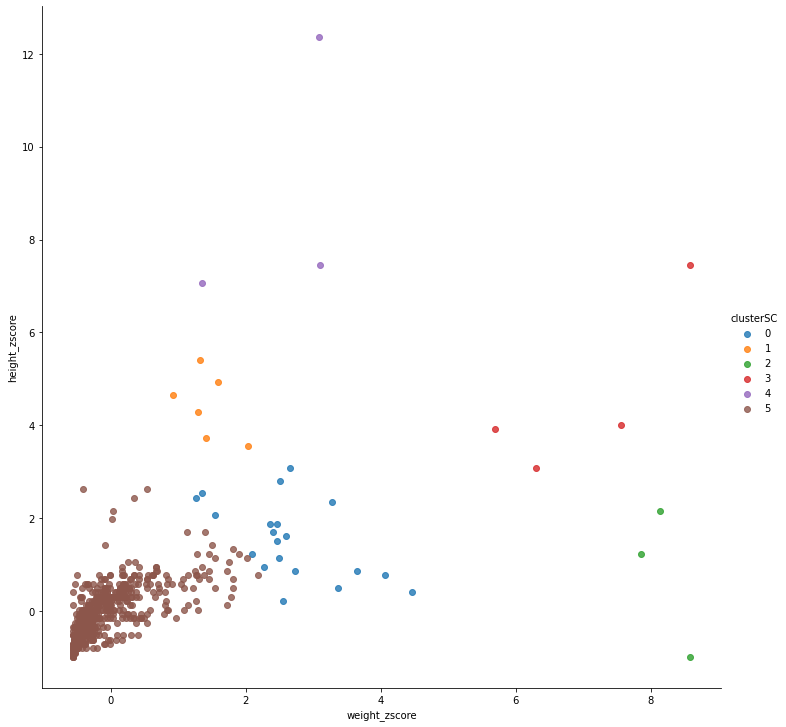

In [492]:
sns.lmplot(x='weight_zscore', y='height_zscore',  height=10, data=pokemon_enc_STANDARDIZED
           ,
           fit_reg=False, hue='clusterSC')

In [493]:
from sklearn.metrics import silhouette_samples, silhouette_score

silhouette_avg = silhouette_score(pokemon_enc_standerdized, sc2)
silhouette_avg

0.7207075151195859

In [494]:
from sklearn import metrics
from sklearn.metrics import pairwise_distances
from sklearn.metrics import calinski_harabasz_score

Calinski= calinski_harabasz_score(pokemon_enc_standerdized, sc2)
Calinski

365.69436085079207

In [495]:
# def distance_intraclusters_squared_distance(single_pokemon):
#     metric = np.array([single_pokemon['weight_zscore'], single_pokemon['height_zscore']])
#     cluster_number = round(single_pokemon['cluster'])
#     distance = 0
#     for cluster_index in range(0, len(cluster_centers)):
#         if cluster_index == cluster_number:
#             center = cluster_centers[cluster_index]
#             distance += sum(np.square(metric - center))
#         else:
#             continue
        
#     return distance

# # evaluate all pokemon
# pokemon_similarity = pokemon_enc_standerdized.apply(distance_intraclusters_squared_distance, axis=1)
# pokemon_similarity = pokemon_similarity.rename('similarity')

# # join to other metrics
# pokemon_processed = pokemon_enc_standerdized.join(pokemon_similarity.to_frame()).join(pokemon['name'].to_frame())

# # pick most dissimilar pokemon per cluster
# chosen_pokemon3 = pd.DataFrame()
# for cluster_index in range(0, len(cluster_centers)):
#     pokemon_cluster = pokemon_processed[pokemon_processed['cluster'] == cluster_index]
#     chosen_pokemon3 = chosen_pokemon3.append(pokemon_cluster[pokemon_cluster['similarity']==pokemon_cluster['similarity'].mean()])

# chosen_pokemon3






### Hierarchical clustering

In [496]:
from sklearn.cluster import AgglomerativeClustering

agg = AgglomerativeClustering(n_clusters=6, linkage='ward')

agg2 = agg.fit_predict(pokemon_enc_standerdized)

In [497]:
cluster_labels = pd.Series(agg.labels_, name='clusterAGG')
pokemon_enc_STANDARDIZED2 = pokemon_enc_standerdized.join(cluster_labels.to_frame())
pokemon_enc_STANDARDIZED2



,weight_zscore,height_zscore,clusterAGG
0,-0.498497,-0.429675,4
1,-0.442679,-0.151804,0
2,0.353406,0.774436,0
3,-0.483856,-0.522299,4
4,-0.387777,-0.059180,0
...,...,...,...
776,8.587859,7.443360,1
777,-0.560720,-0.800171,4
778,7.563928,4.016274,1
779,1.542959,1.144932,2


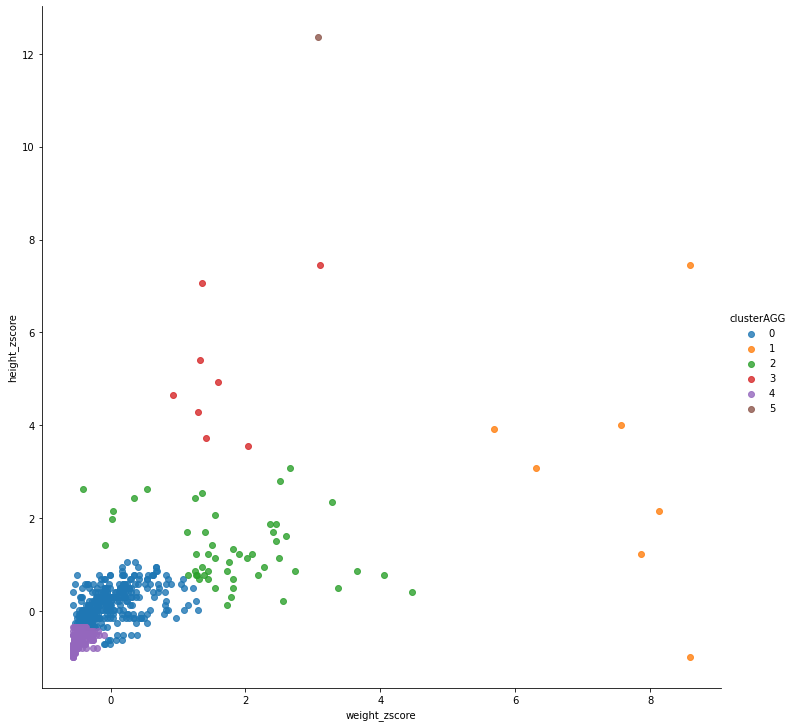

In [498]:
sns.lmplot(x='weight_zscore', y='height_zscore',  height=10, data=pokemon_enc_STANDARDIZED2
           ,
           fit_reg=False, hue='clusterAGG')

In [499]:
silhouette_avg2 = silhouette_score(pokemon_enc_standerdized, agg2)
silhouette_avg2

0.46909987707285355

In [500]:
Calinski2 = calinski_harabasz_score(pokemon_enc_standerdized, agg2)
Calinski2

806.8042760057672

### Bayesian Gaussian Mixture

In [501]:
from sklearn.mixture import BayesianGaussianMixture

bgm = BayesianGaussianMixture(n_components=6, random_state=42)

bgm2  = bgm.fit_predict(pokemon_enc_standerdized)
bgm3  = bgm.predict(pokemon_enc_standerdized)

cluster_labelsBGM = pd.Series(bgm3, name='clusterBGM')
pokemon_enc_STANDARDIZED3 = pokemon_enc_standerdized.join(cluster_labelsBGM.to_frame())
pokemon_enc_STANDARDIZED3

,weight_zscore,height_zscore,clusterBGM
0,-0.498497,-0.429675,0
1,-0.442679,-0.151804,0
2,0.353406,0.774436,2
3,-0.483856,-0.522299,0
4,-0.387777,-0.059180,0
...,...,...,...
776,8.587859,7.443360,4
777,-0.560720,-0.800171,0
778,7.563928,4.016274,4
779,1.542959,1.144932,1


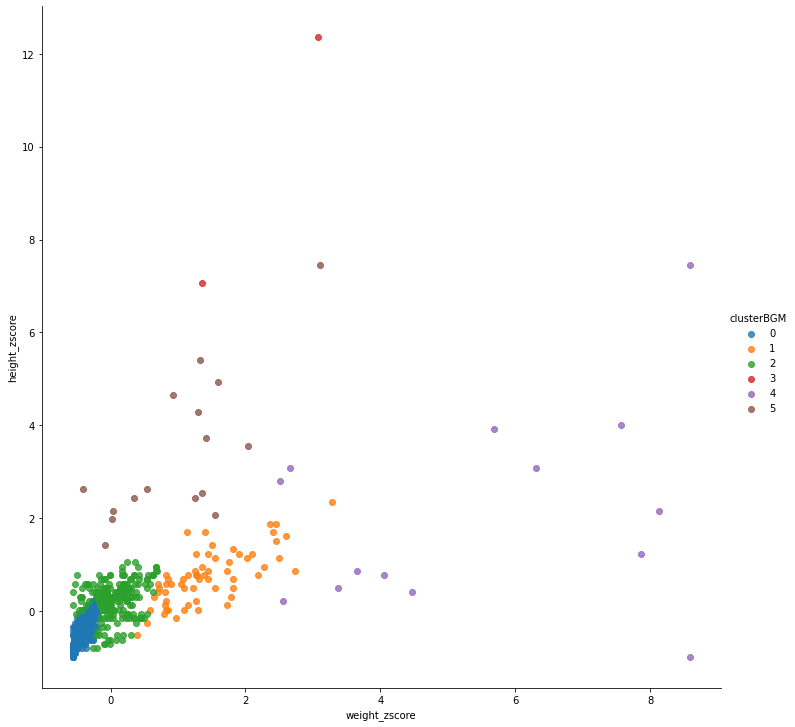

In [502]:
sns.lmplot(x='weight_zscore', y='height_zscore',  height=10, data=pokemon_enc_STANDARDIZED3
           ,
           fit_reg=False, hue='clusterBGM')

In [503]:
silhouette_avg3 = silhouette_score(pokemon_enc_standerdized, bgm2)
silhouette_avg3 

0.45252727006875965

In [504]:
Calinski3 = calinski_harabasz_score(pokemon_enc_standerdized, bgm2)
Calinski3 

565.5762408779143

## Comparison



#### Silhouette Coefficient
##### The score is bounded between -1 for incorrect clustering and +1 for highly dense clustering. Scores around zero indicate overlapping clusters.
##### The score is higher when clusters are dense and well separated, which relates to a standard concept of a cluster.

#### Calinski-Harabasz Index
##### If the ground truth labels are not known, the Calinski-Harabasz index (sklearn.metrics.calinski_harabasz_score) - also known as the Variance Ratio Criterion - can be used to evaluate the model, where a higher Calinski-Harabasz score relates to a model with better defined clusters.
##### The index is the ratio of the sum of between-clusters dispersion and of inter-cluster dispersion for all clusters (where dispersion is defined as the sum of distances squared)

In [505]:
df = pd.DataFrame(np.array([[silhouette_avg, silhouette_avg2, silhouette_avg3], [ Calinski, Calinski2, Calinski3]]),

                   columns=['Spectral Clustering', 'Hierarchical Clustering', 'Bayesian Gaussian mixture'])
df = df.rename({0: 'Silhouette coefficient', 1: 'Calinski-Harabasz Index'}, axis='index')
df

,Spectral Clustering,Hierarchical Clustering,Bayesian Gaussian mixture
Silhouette coefficient,0.720708,0.469100,0.452527
Calinski-Harabasz Index,365.694361,806.804276,565.576241
